In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 17483 (delta 79), reused 30 (delta 30), pack-reused 17374 (from 4)
Receiving objects: 100% (17483/17483), 16.39 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (11984/11984), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s

In [1]:
from google.colab import files
uploaded = files.upload()  # Buradan dataset.zip dosyanı yükle


Saving dataset.zip to dataset.zip


In [2]:
import zipfile

with zipfile.ZipFile("/content/dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data_yolo")


In [3]:
import os
import xml.etree.ElementTree as ET

class_map = {'Car': 0, 'Motorcycle': 1, 'Bus': 2, 'Truck': 3, 'Taxi': 4}

def convert_annotation(xml_path, txt_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    size = root.find("size")
    img_w = int(size.find("width").text)
    img_h = int(size.find("height").text)

    with open(txt_path, "w") as out_file:
        for obj in root.findall("object"):
            label = obj.find("name").text
            if label not in class_map:
                continue
            class_id = class_map[label]
            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            xmax = int(bndbox.find("xmax").text)
            ymin = int(bndbox.find("ymin").text)
            ymax = int(bndbox.find("ymax").text)

            x_center = ((xmin + xmax) / 2) / img_w
            y_center = ((ymin + ymax) / 2) / img_h
            width = (xmax - xmin) / img_w
            height = (ymax - ymin) / img_h

            out_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")


In [4]:
splits = ['train', 'val', 'test']

for split in splits:
    label_dir = f"/content/data_yolo/labels/{split}"
    for file in os.listdir(label_dir):
        if file.endswith(".xml"):
            xml_path = os.path.join(label_dir, file)
            txt_path = os.path.join(label_dir, file.replace(".xml", ".txt"))
            convert_annotation(xml_path, txt_path)


In [5]:
data_yaml = """
train: ../data_yolo/images/train
val: ../data_yolo/images/val
test: ../data_yolo/images/test

nc: 5
names: ['Car', 'Motorcycle', 'Bus', 'Truck', 'Taxi']
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)


In [7]:
# YOLOv5 kodlarını GitHub'dan indir
!git clone https://github.com/ultralytics/yolov5

# YOLOv5 klasörüne geç
%cd yolov5

# Gerekli paketleri yükle
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17483 (delta 79), reused 30 (delta 30), pack-reused 17376 (from 4)
Receiving objects: 100% (17483/17483), 16.33 MiB | 6.66 MiB/s, done.
Resolving deltas: 100% (11983/11983), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s

In [8]:
!mv /content/data.yaml /content/yolov5/


In [9]:
%cd /content/yolov5

!python train.py --img 416 --batch 16 --epochs 20 --data data.yaml --weights yolov5s.pt --name arac_siniflandirma_gpu


/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-25 15:06:31.791808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748185592.029124   19730 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748185592.092297   19730 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for 

In [10]:
!python detect.py --weights runs/train/arac_siniflandirma_gpu/weights/best.pt \
--img 416 --conf 0.4 --source ../data_yolo/images/test --name test_sonuclari


detect: weights=['runs/train/arac_siniflandirma_gpu/weights/best.pt'], source=../data_yolo/images/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_sonuclari, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/221 /content/data_yolo/images/test/0196_jpg.rf.8764d4c3b12327cda5a69dac1aed9742.jpg: 416x416 1 Truck, 7.1ms
image 2/221 /content/data_yolo/images/test/0239_jpg.rf.8ba6830667971adfa216fce88961d88d.jpg: 416x416 1 Car, 7.8ms
image 3/221 /content/data_yolo/images/test/0257_jp

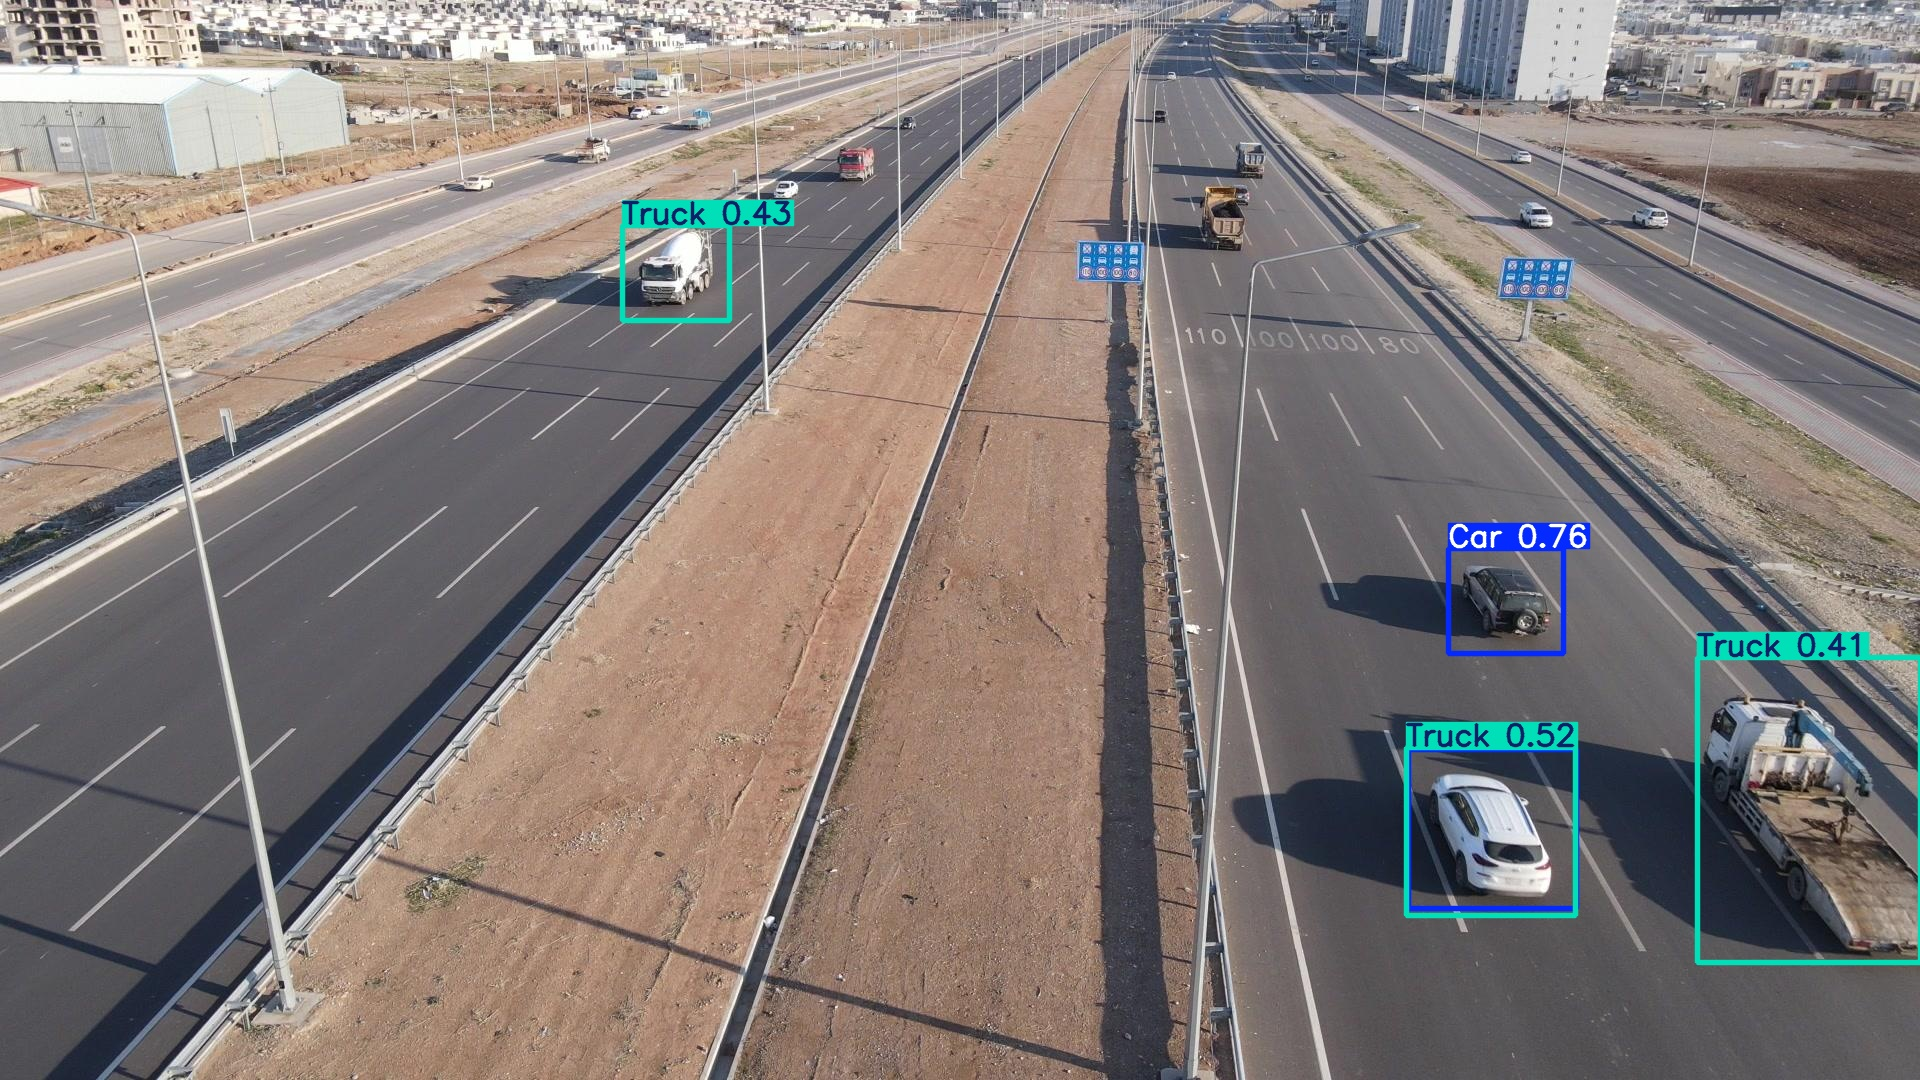

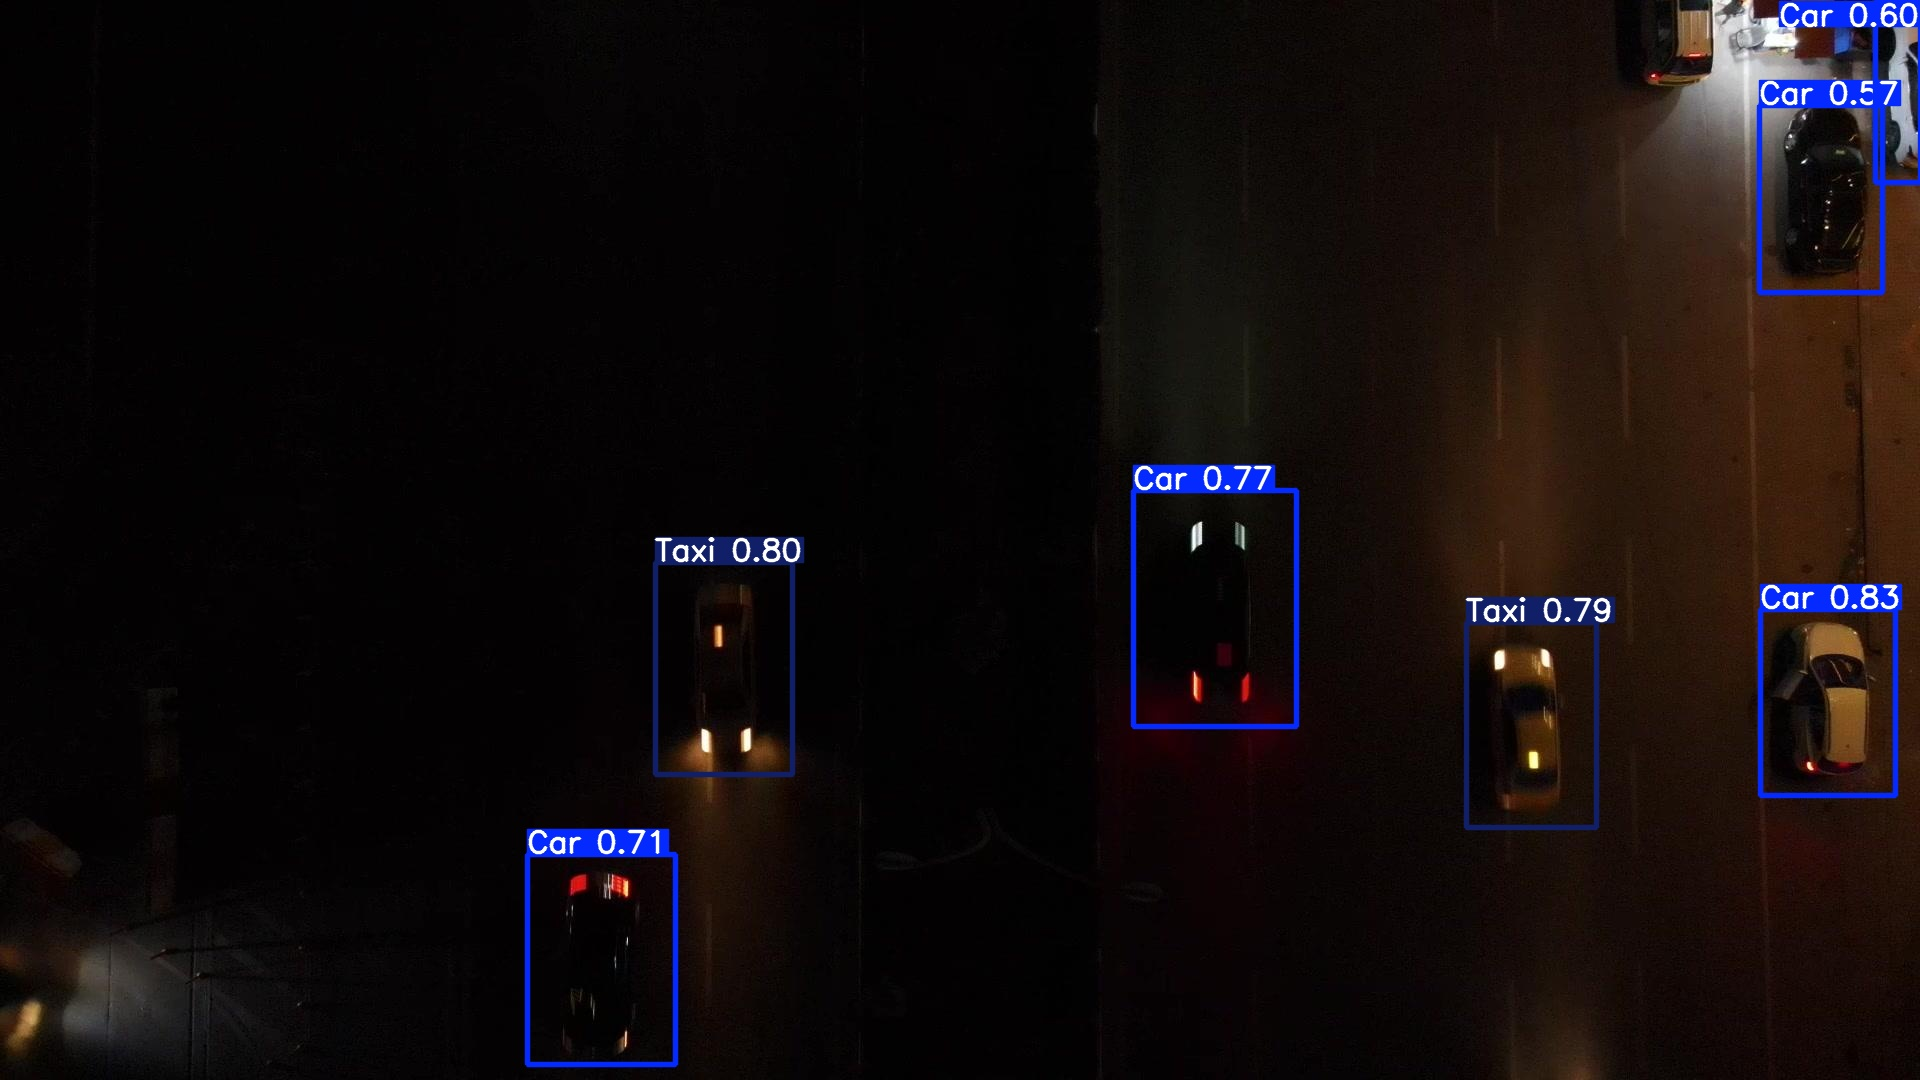

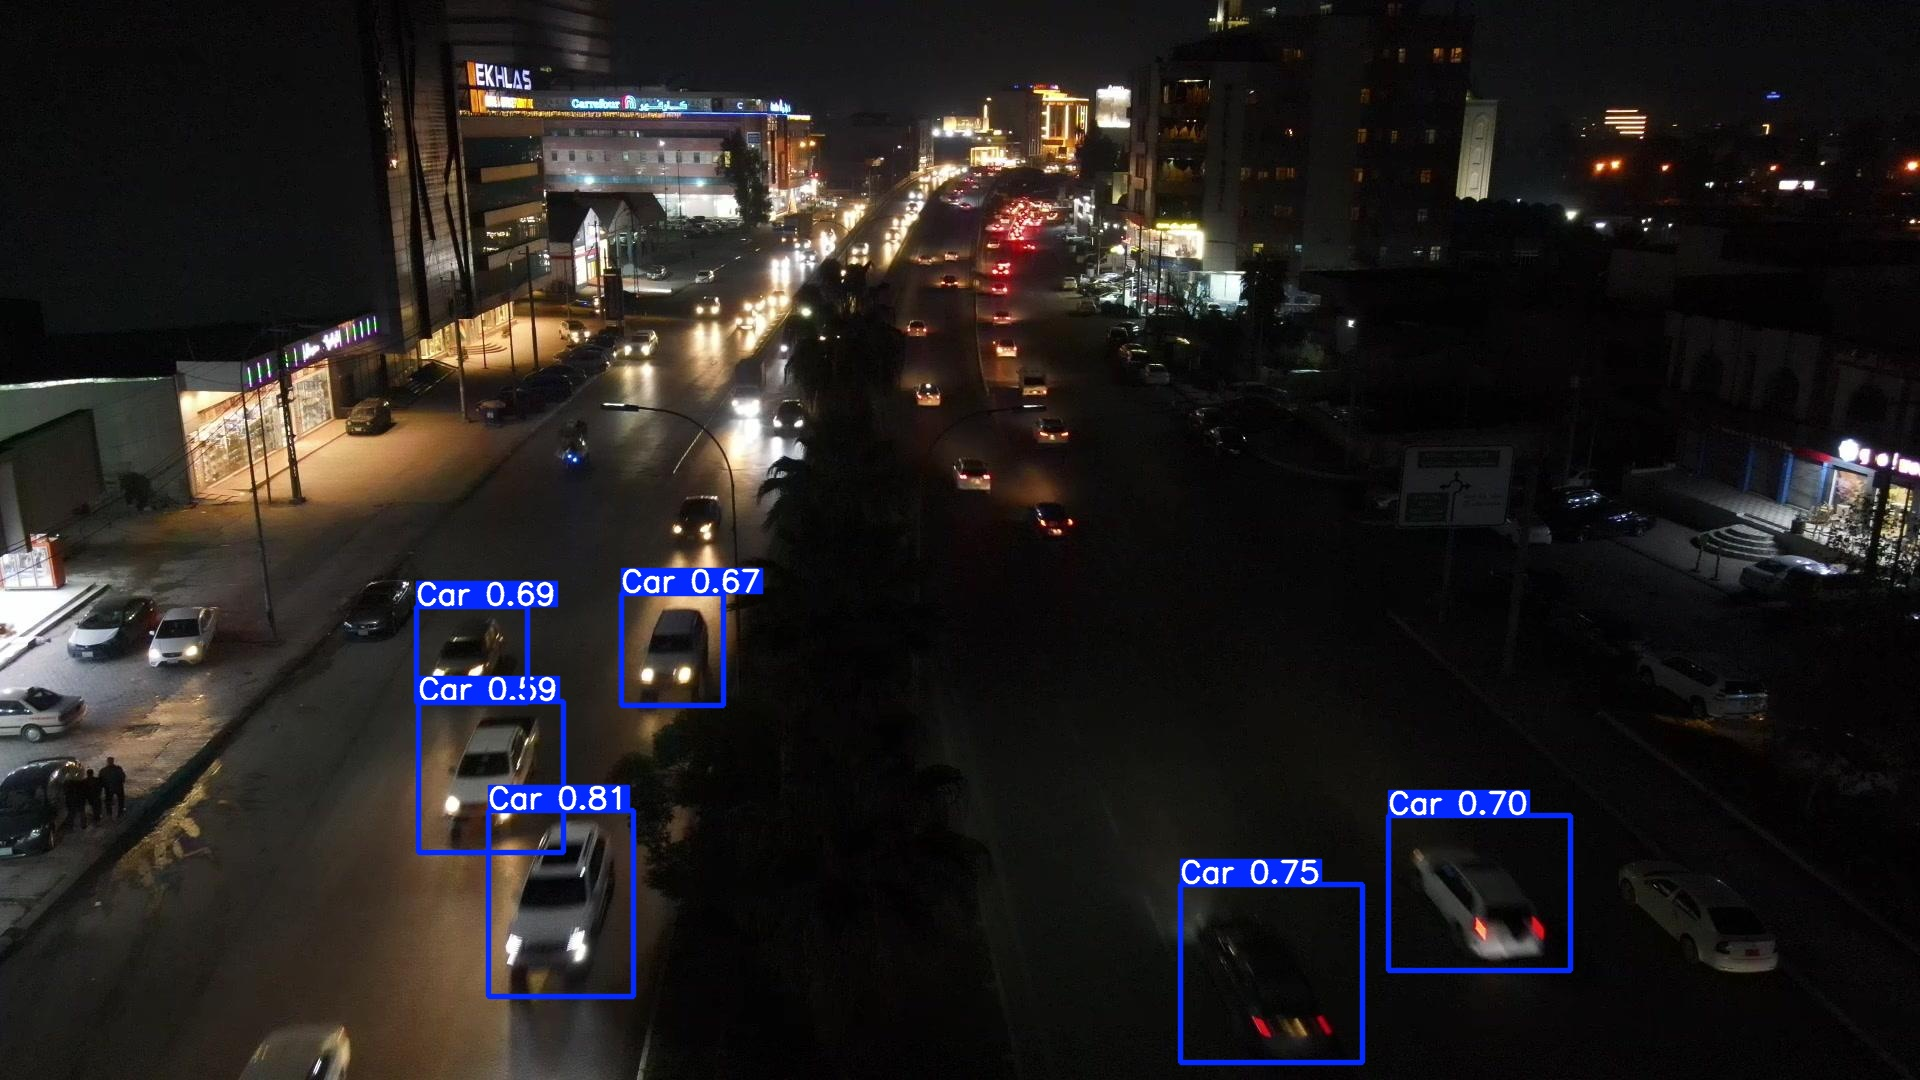

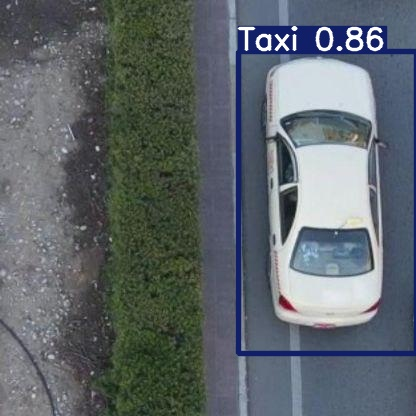

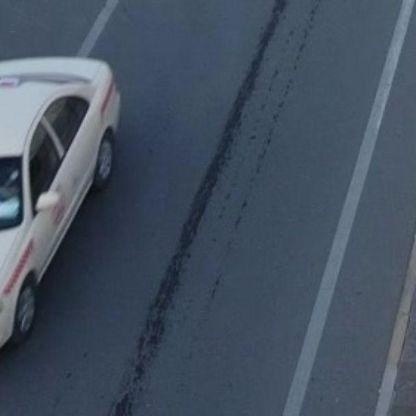

In [12]:
import glob
from IPython.display import Image, display

image_paths = glob.glob('runs/detect/test_sonuclari/*.jpg')

for img_path in image_paths[:5]:  # sadece ilk 5 tahmini göster
    display(Image(filename=img_path))


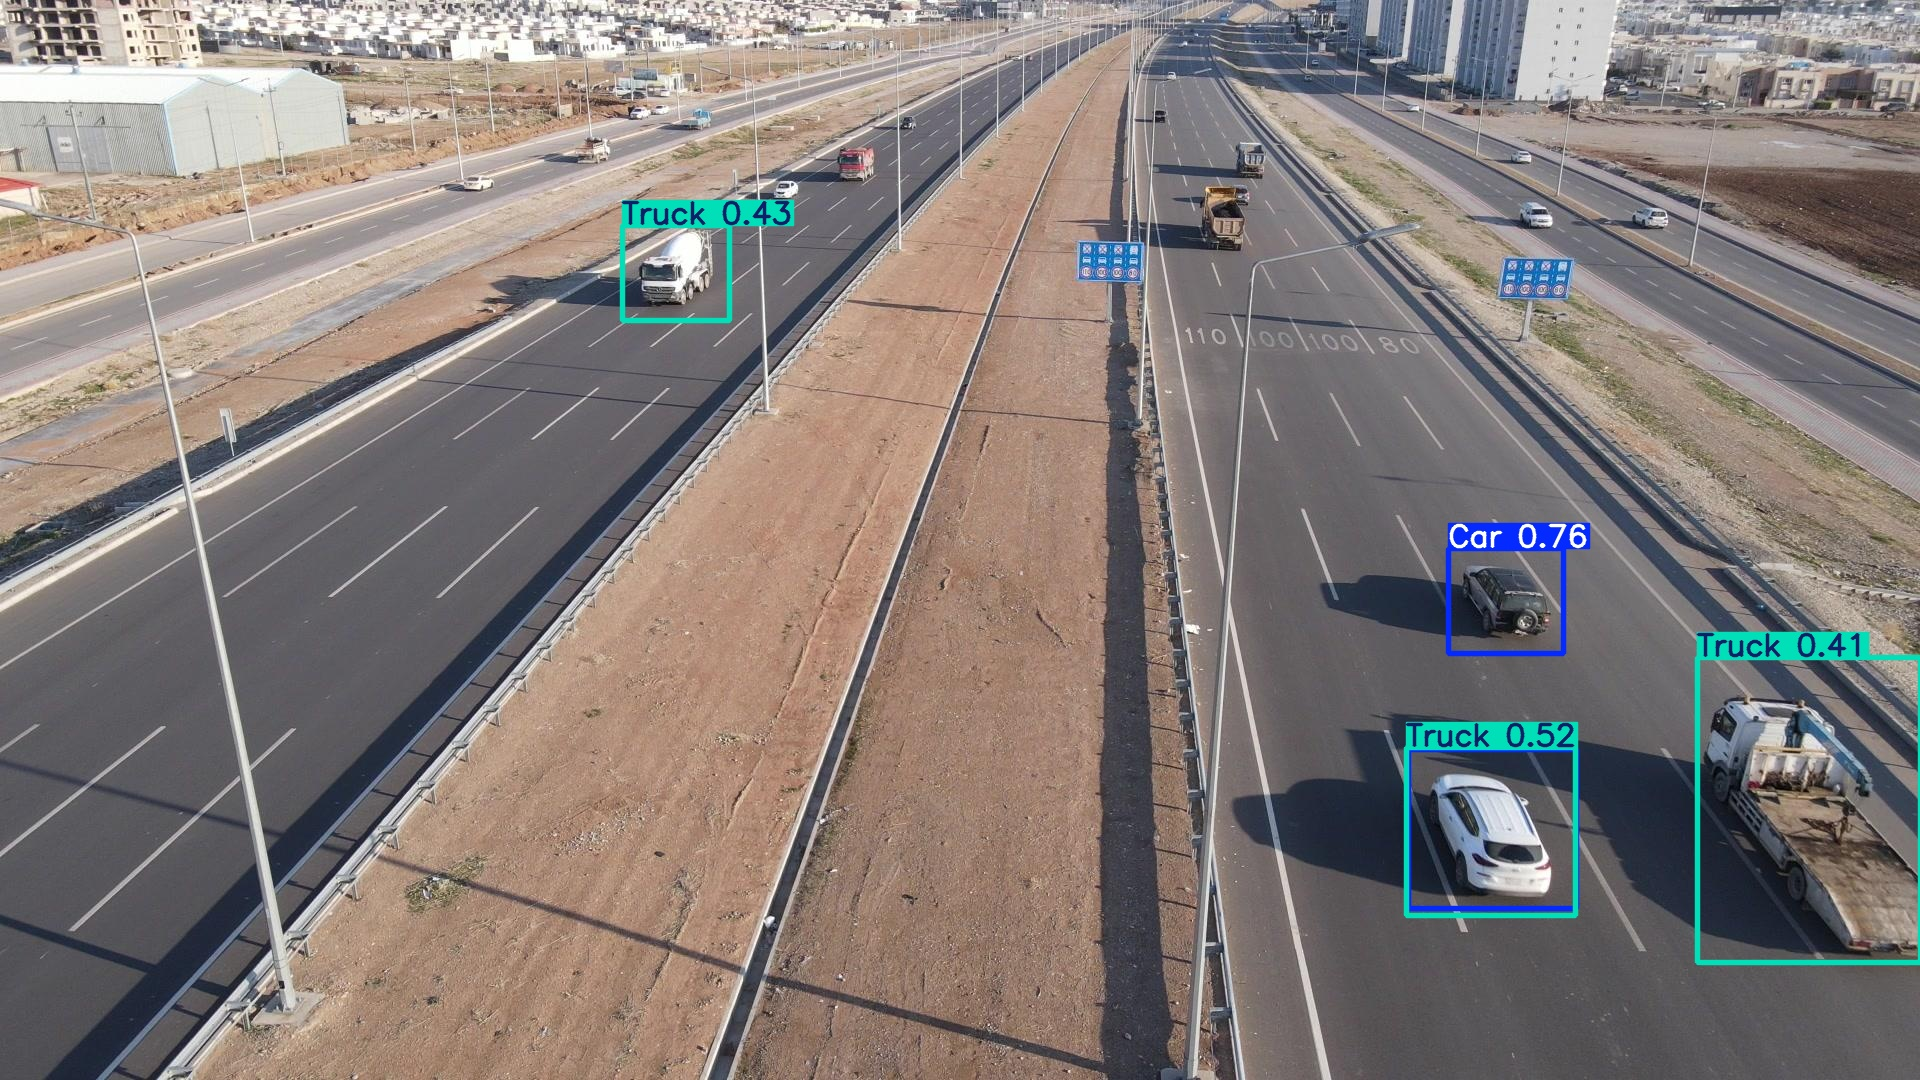

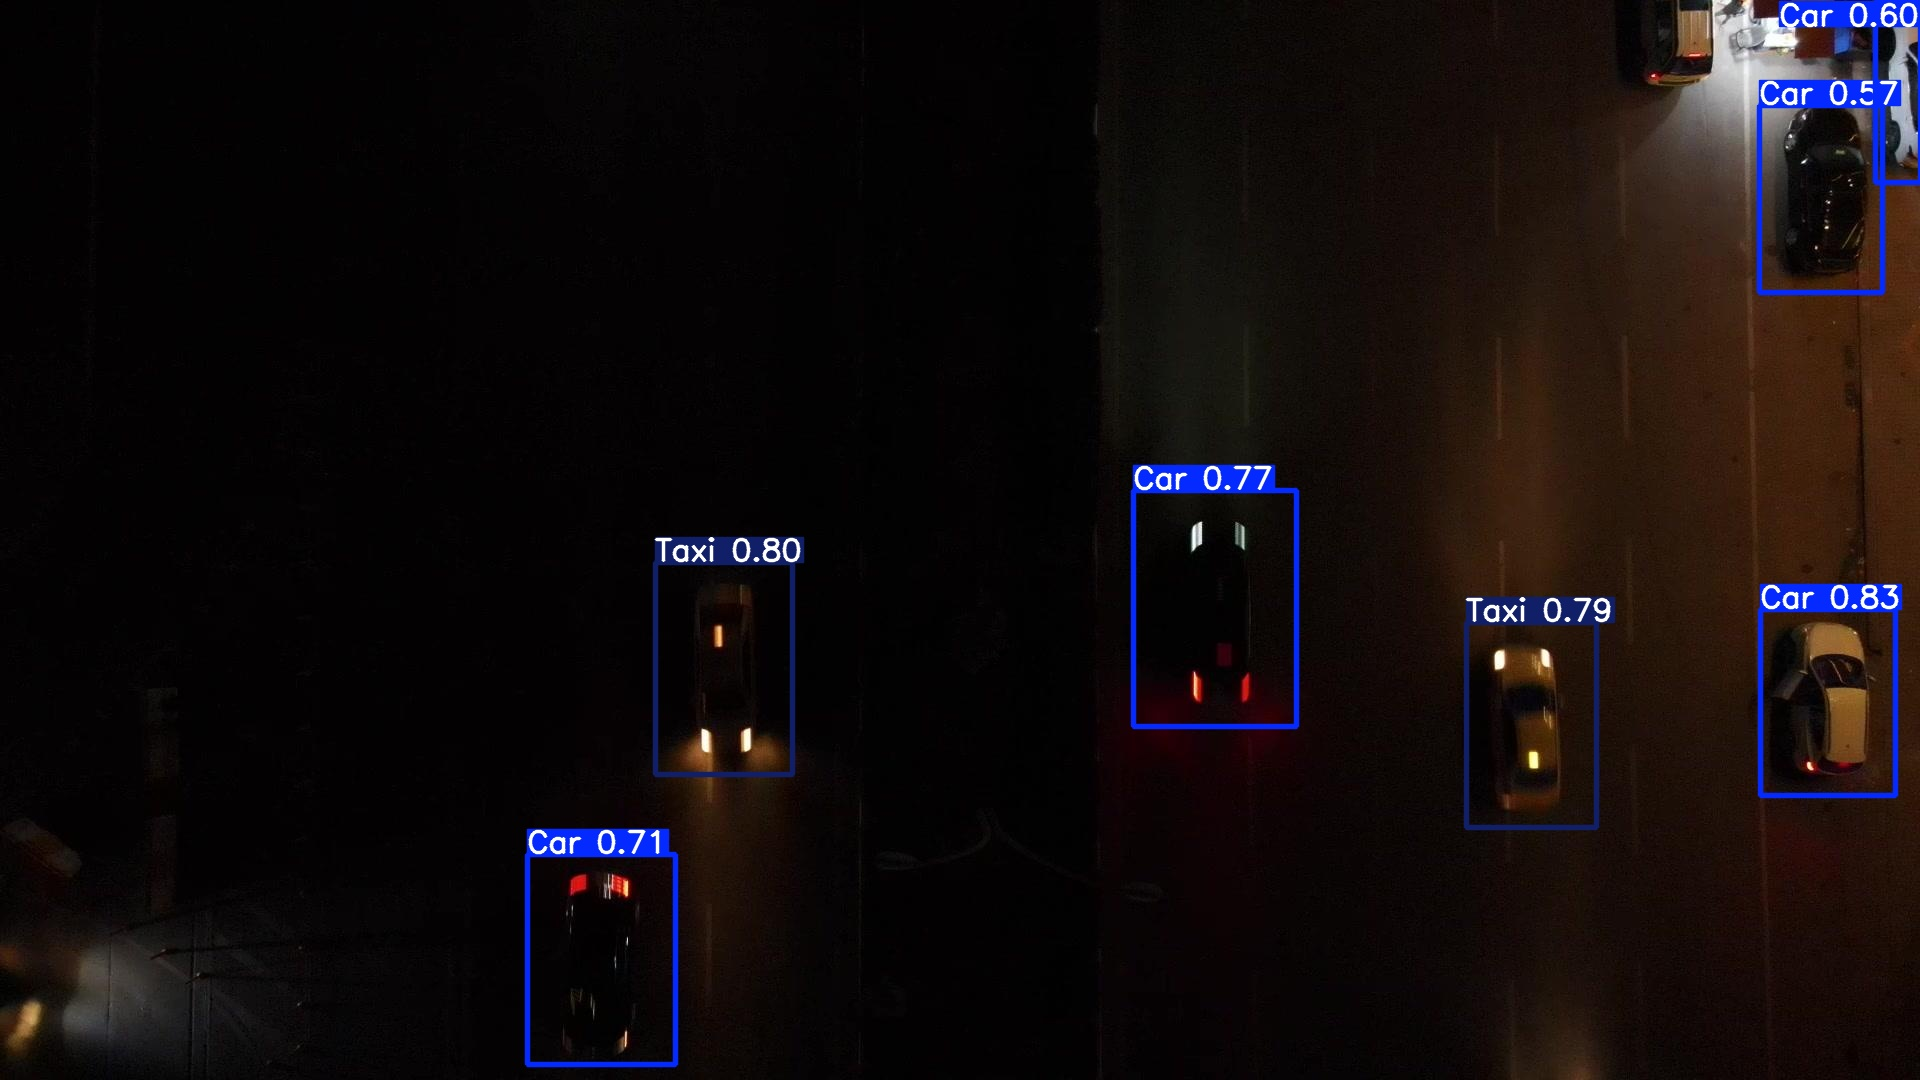

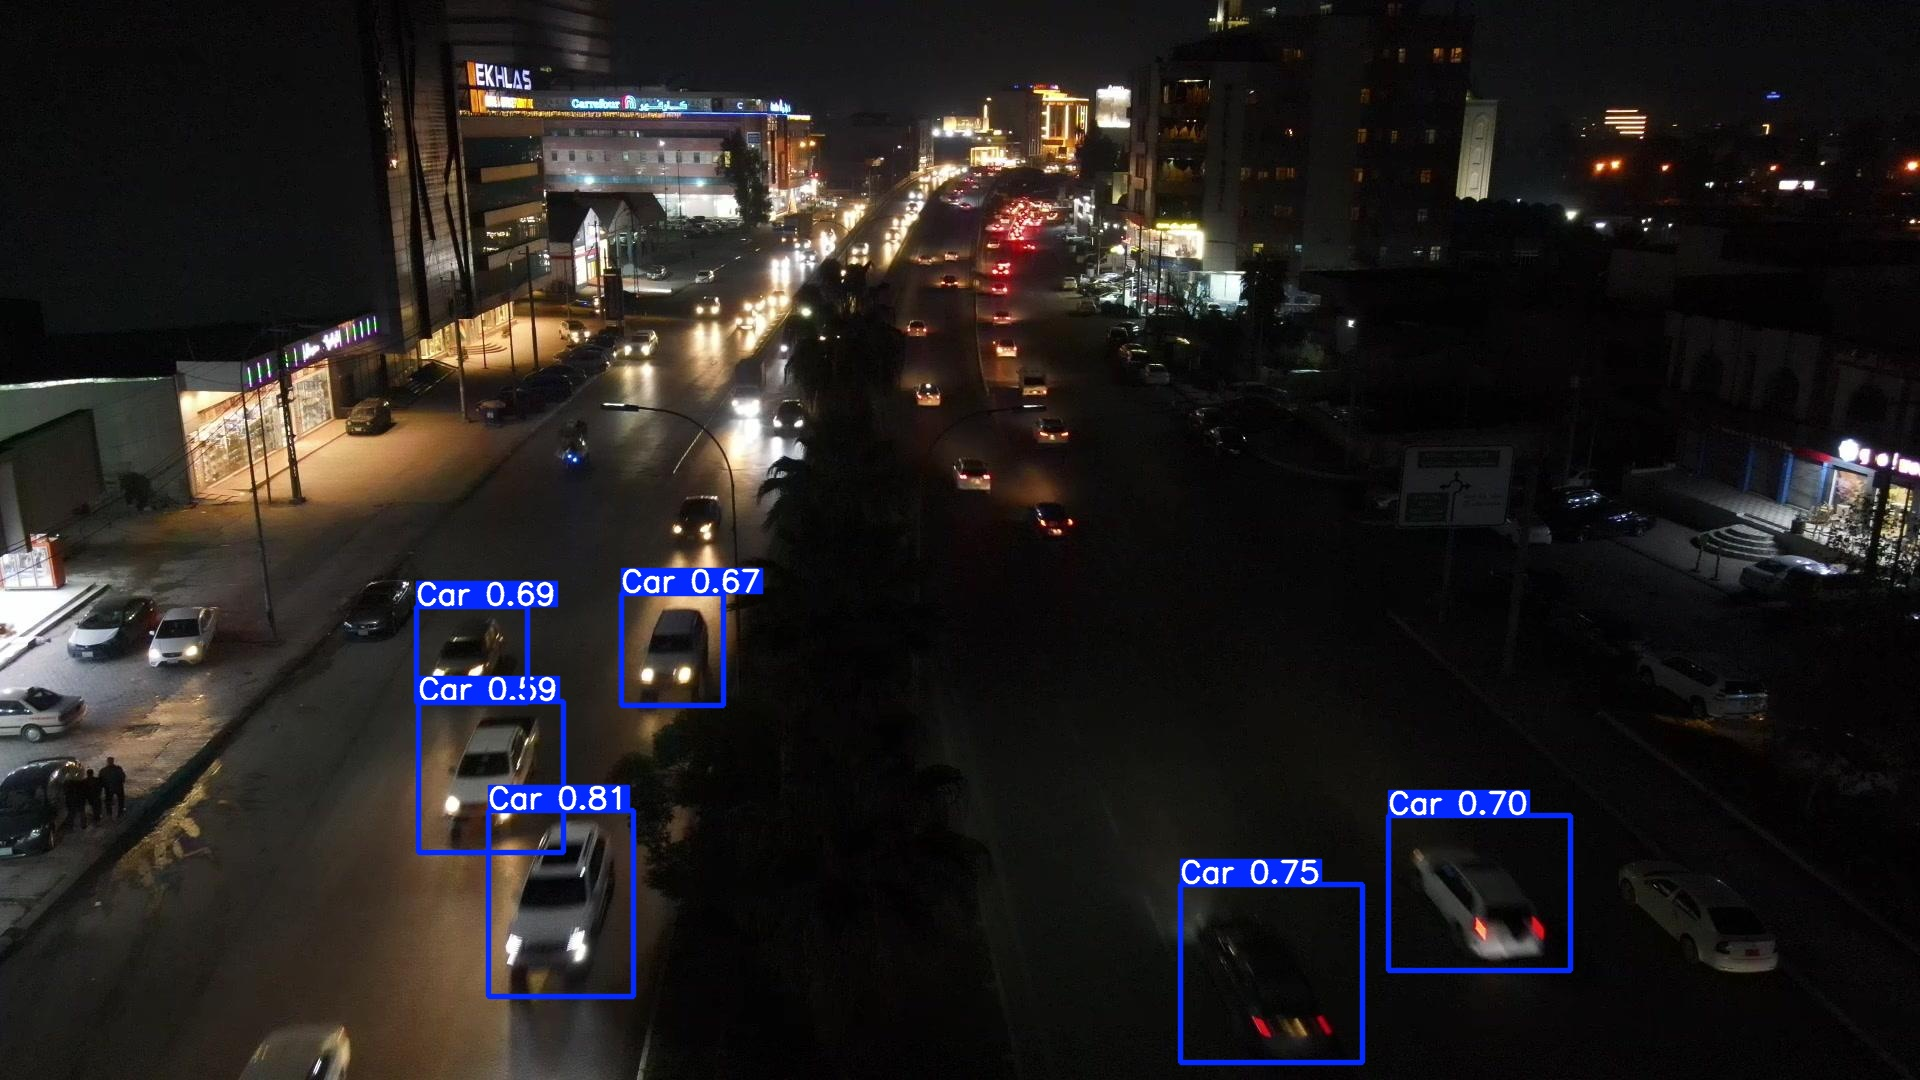

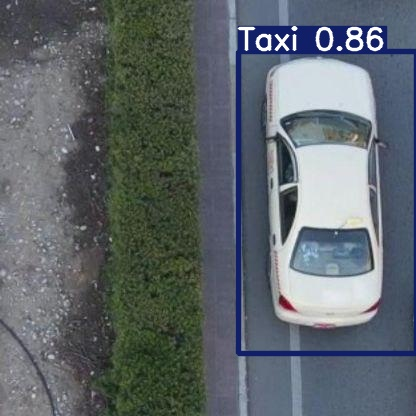

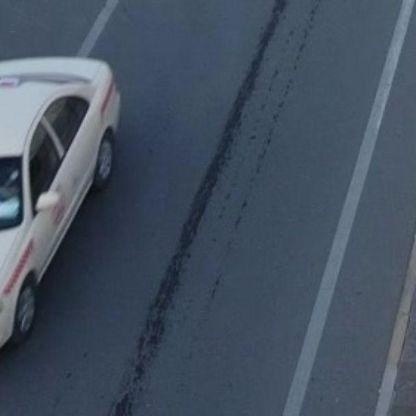

In [13]:
import glob
from IPython.display import Image, display

image_paths = glob.glob('runs/detect/test_sonuclari/*.jpg')

for img_path in image_paths[:5]:  # sadece ilk 5 tahmini göster
    display(Image(filename=img_path))


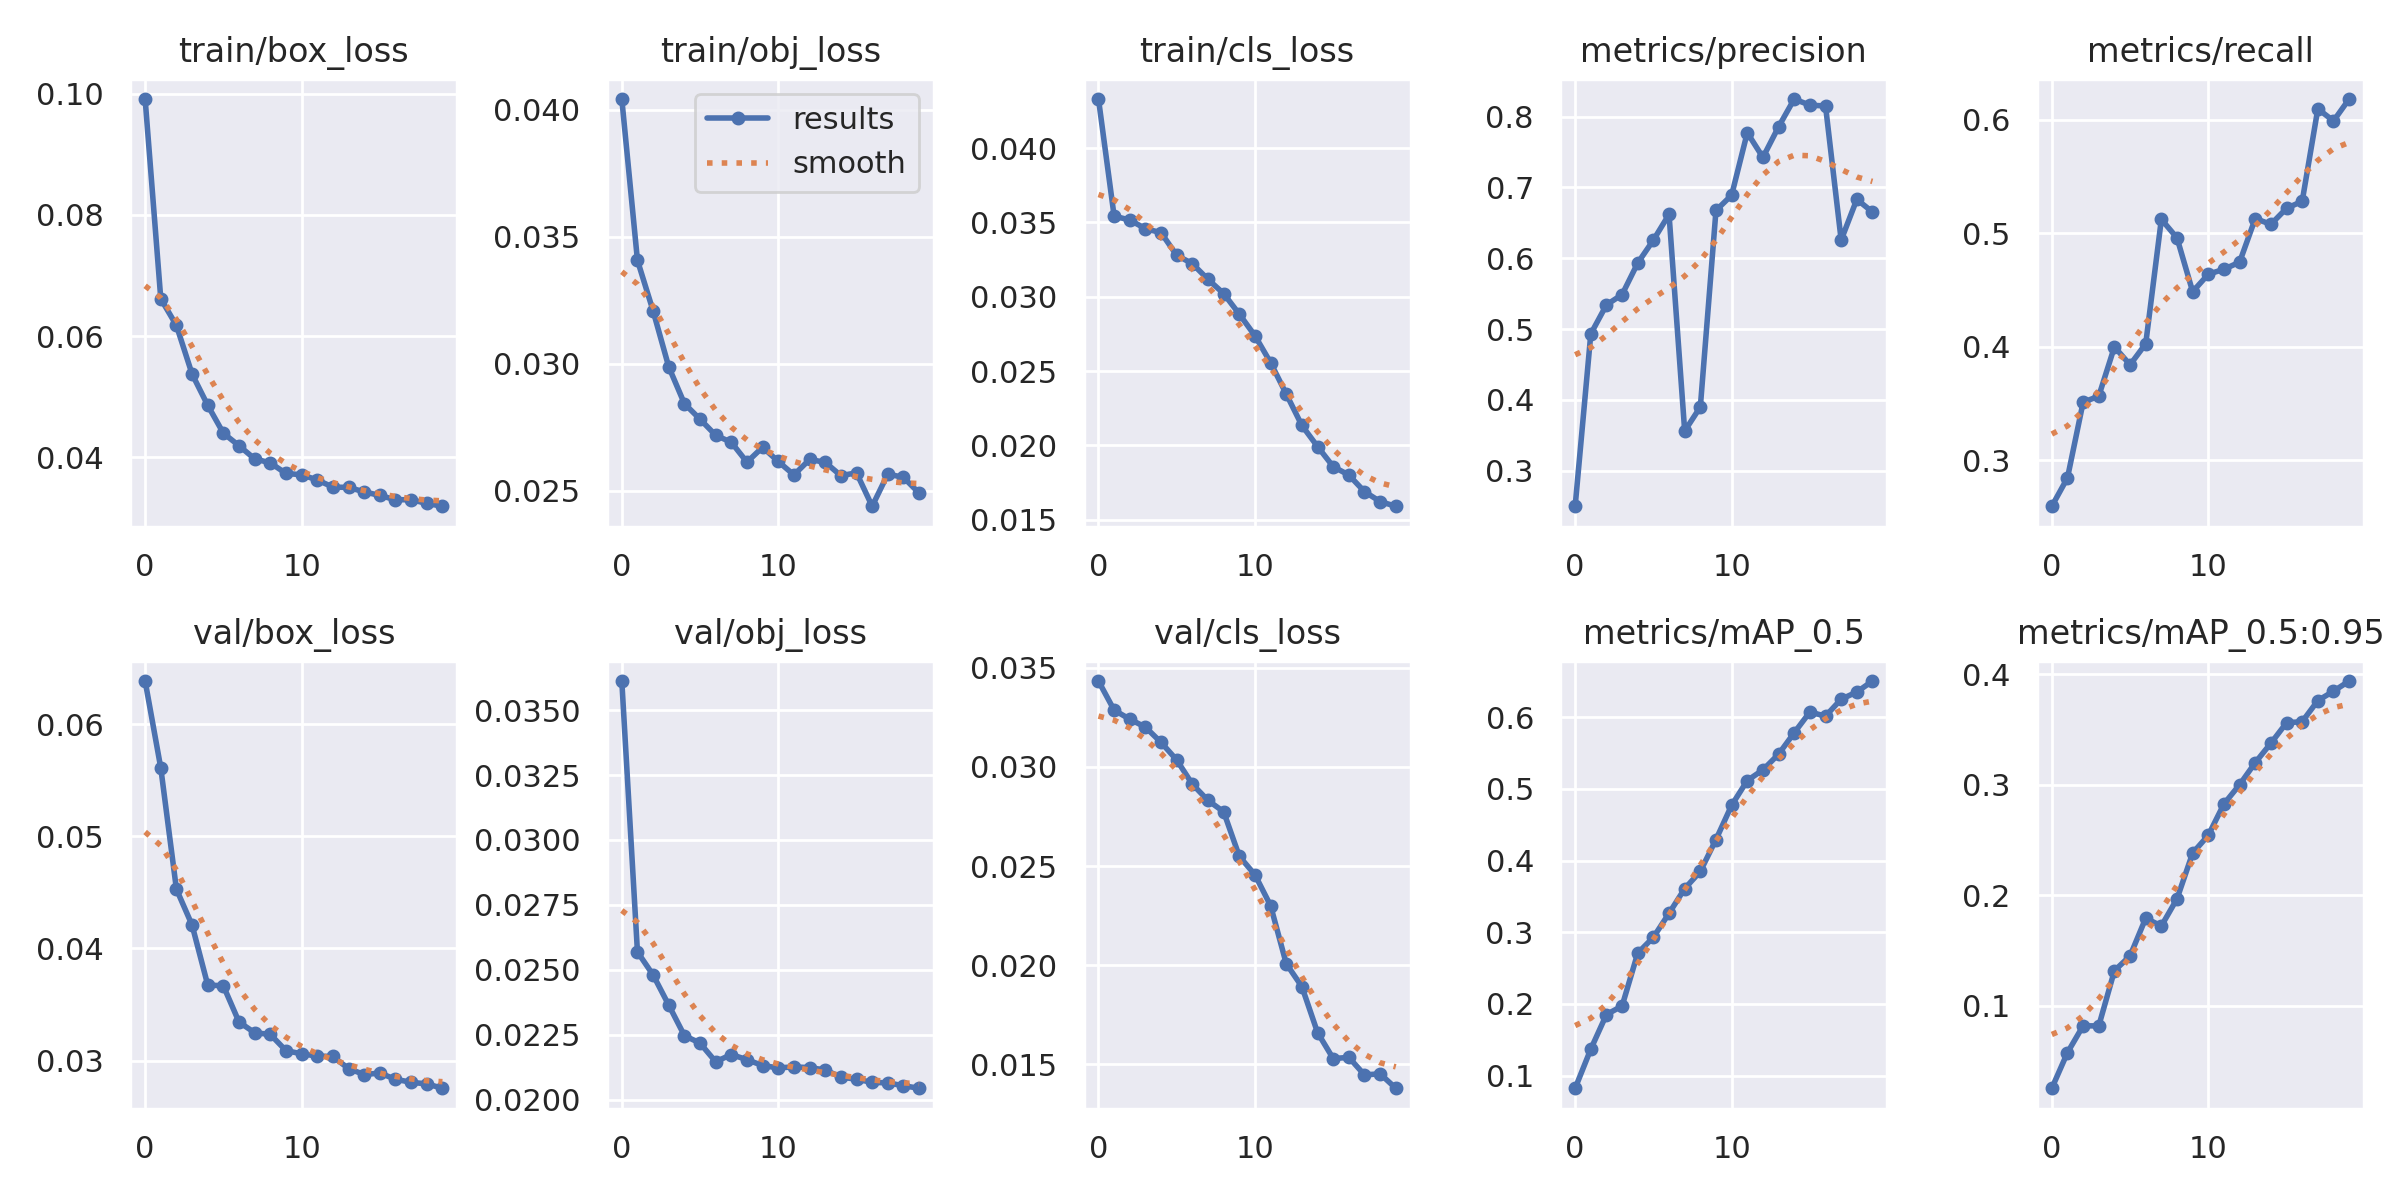

In [14]:
from IPython.display import Image
Image(filename='runs/train/arac_siniflandirma_gpu/results.png')


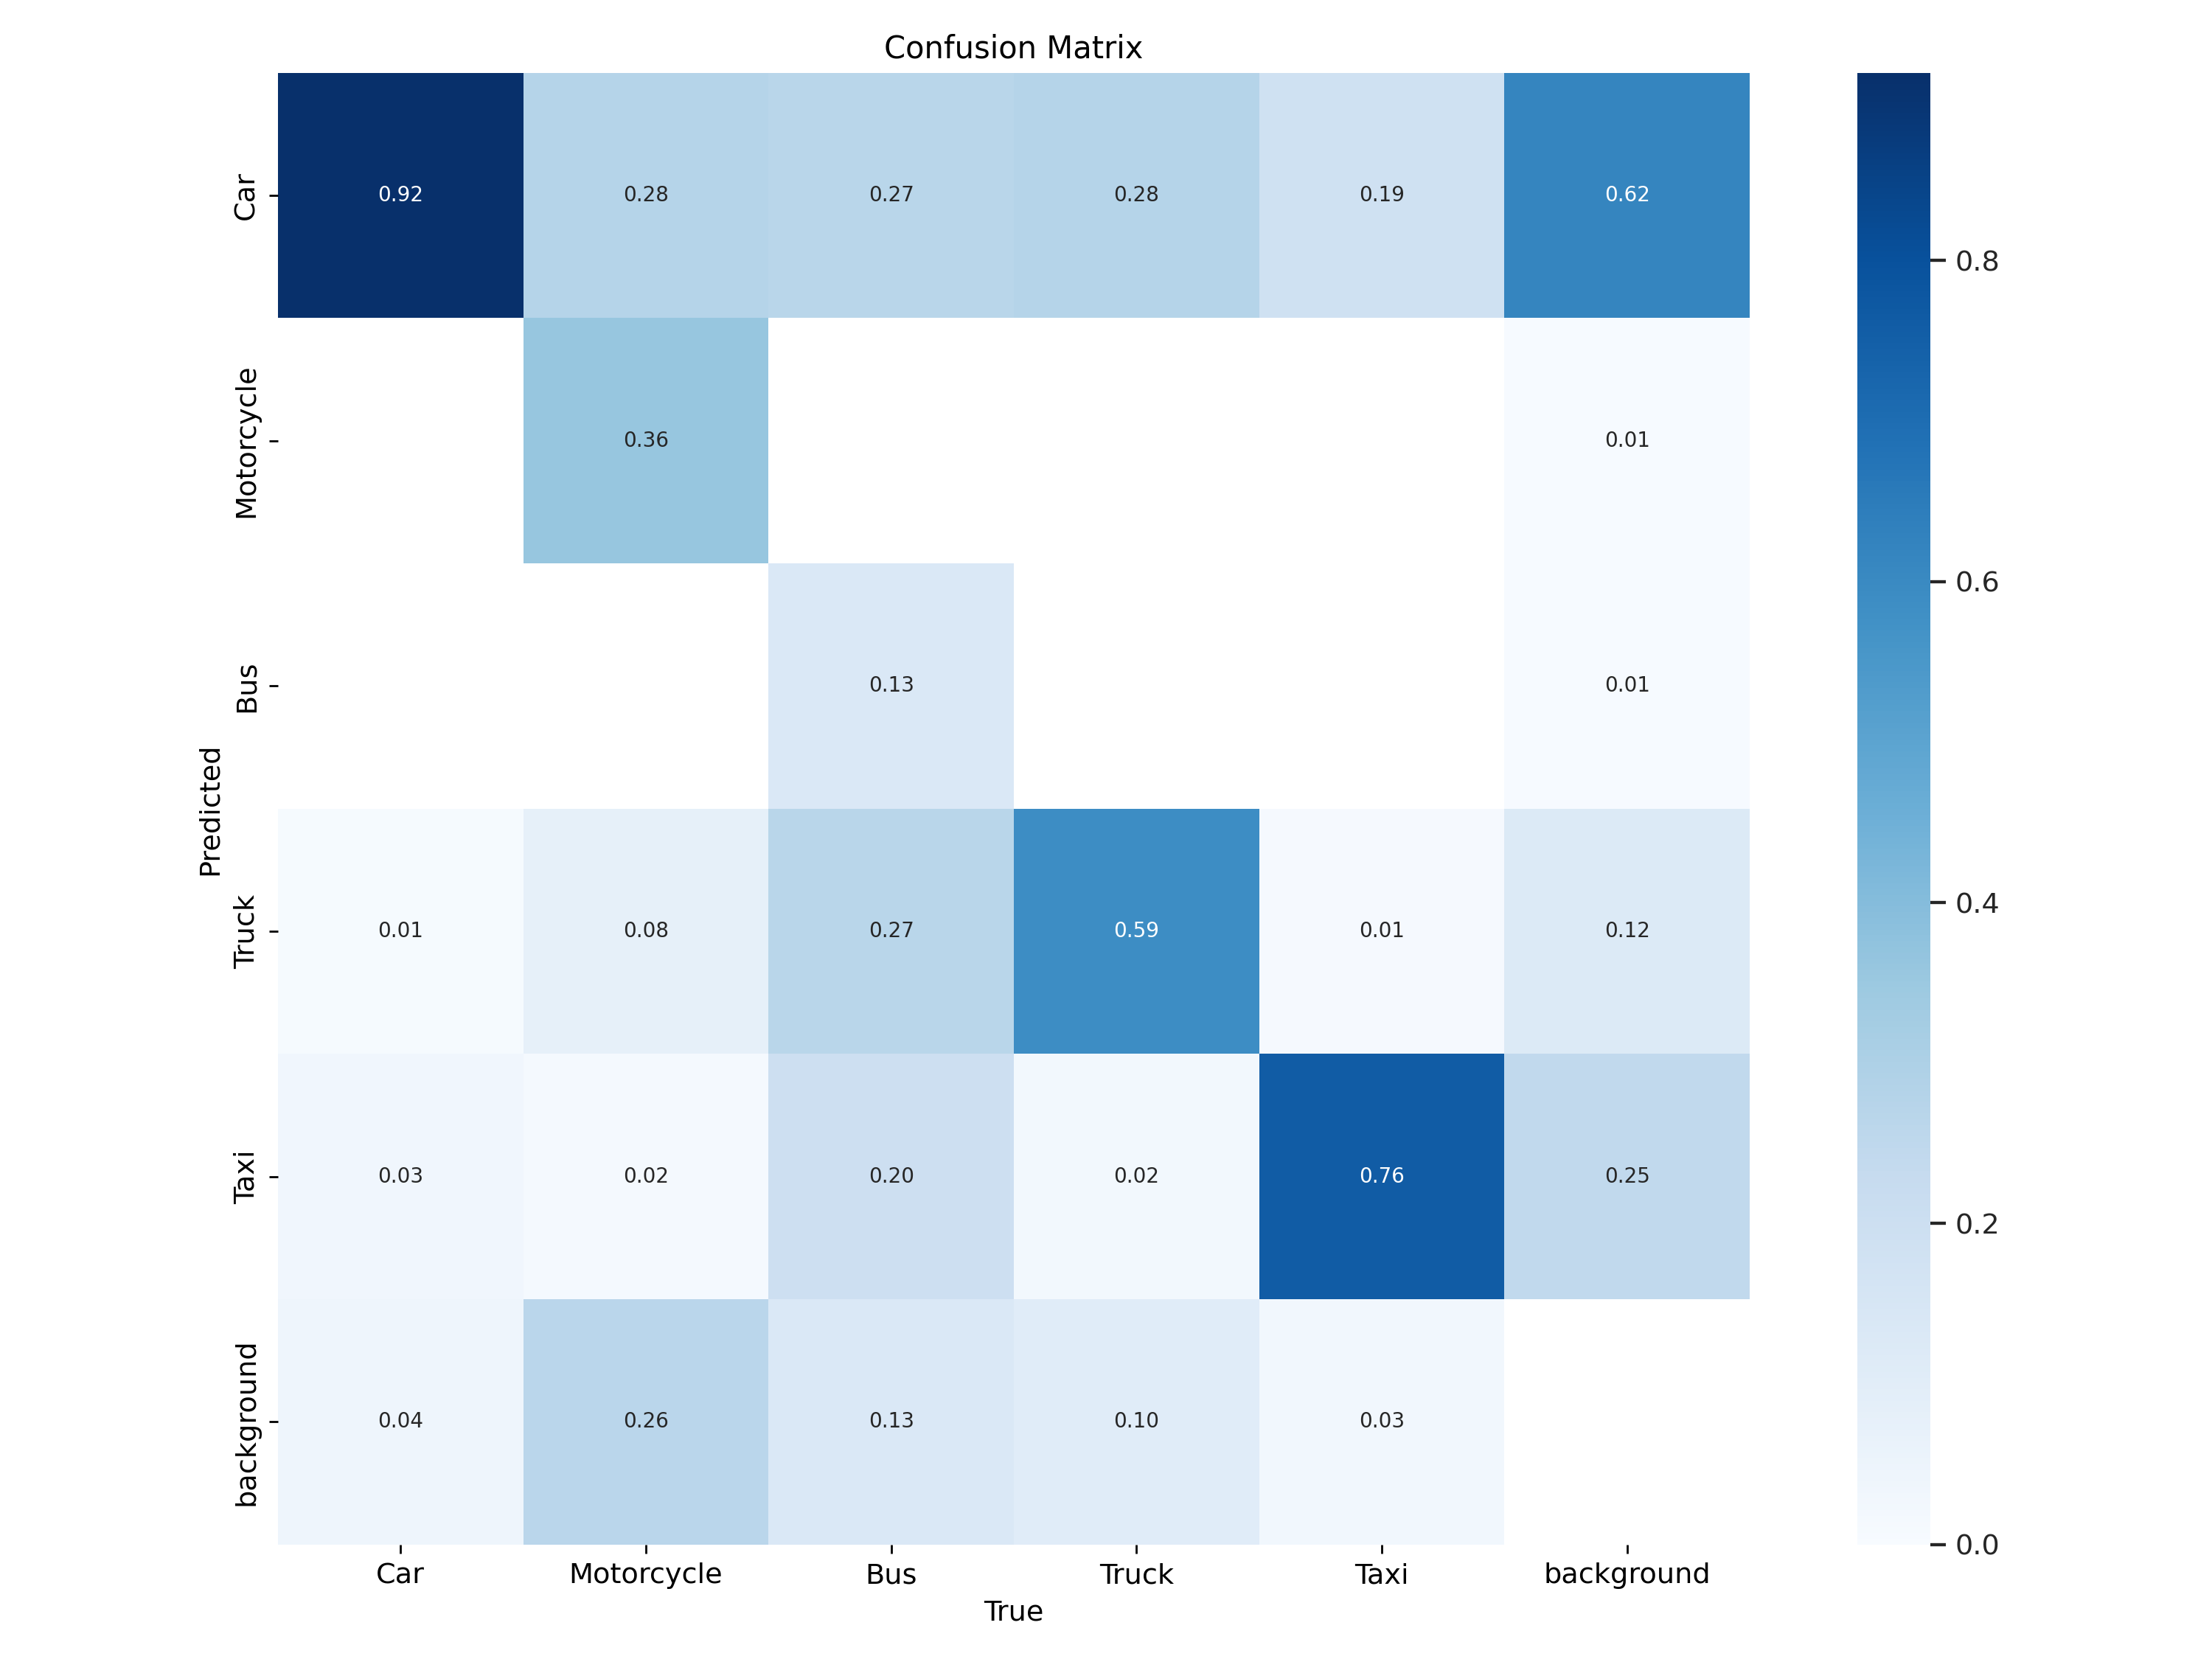

In [15]:
Image(filename='runs/train/arac_siniflandirma_gpu/confusion_matrix.png')
